In [18]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.tree import SurvivalTree
import pandas as pd
import numpy as np

In [30]:
whas = pd.read_excel("C:\\Users\\soura\\Documents\\ECMM451\\resources\\other_data\\whas.xlsx")
whas.drop(['ID'] , axis = 1 , inplace = True)
# whas.shape
X = np.array(whas.iloc[: , :-2])
y = np.array(whas.iloc[: , -2:])

# get sorted index based on duration
idx = np.argsort(y[:,0])

# arrange events and covariates with same index
index = idx.astype('int64')
durations = y[: , 0][idx].astype('int64')
events = y[: , 1][idx].astype('int64')
covariates = X[idx]

# make y as structured array
y_struct = np.array(list(zip(events , durations)), dtype=[('fstat', 'bool'), ('lenfol', int)])

estimator = SurvivalTree().fit(covariates, y_struct)

surv_funcs = estimator.predict_survival_function(covariates[15:200])

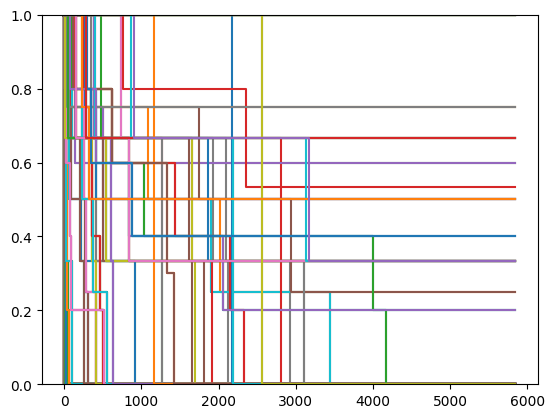

In [31]:
for fn in surv_funcs:
   plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

In [28]:
durations[5:20]

array([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)